# Predicting House Pricing with Machine Learning

**Note**: This project uses a Kaggle dataset. [Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In this notebook, we're going to go through the Kaggle House Prices - Advanced Regression Techniques Competition.

## 1. Problem Definition

The goal of this project is to develop a machine learning model capable of accurately predicting the sale price of residential properties. The dataset consists of various features that capture the physical attributes, location, and condition of the houses. By leveraging these features, the model aims to provide precise price estimates, which can support buyers, sellers, and real estate professionals in making informed decisions.

This problem represents a supervised regression task, where the target variable is the continuous numerical sale price of the properties.

---

## 2. Data

This project uses the dataset provided by the Kaggle House Prices Competition. The dataset contains 79 explanatory variables describing various attributes of residential properties in Ames, Iowa, along with the target variable `SalePrice`, which represents the property's sale price in dollars.

### Data Files
- `train.csv`: The training dataset, including features and the target variable, `SalePrice`.
- `test.csv`: The test dataset, containing features but no target variable. This is used for evaluating the model.
- `data_description.txt`: A detailed guide to the meaning and significance of each feature.
- `sample_submission.csv`: An example of the required format for model predictions.

---

## 3. Evaluation

The primary objective of this project is to predict the sale price (`SalePrice`) for each house in the test set. The evaluation is based on the **Root Mean Squared Logarithmic Error (RMSLE)** calculated between the logarithm of the predicted and actual values of `SalePrice`.

### **Why RMSLE?**
Taking the logarithm ensures that errors in predicting expensive and inexpensive houses impact the result equally, providing a fairer evaluation metric.

### **Metric**
The RMSLE is computed as:

$$
RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(\text{Prediction}_i + 1) - \log(\text{Actual}_i + 1))^2}
$$

Where:
- $n$: Total number of predictions.
- $\log(\text{Prediction}_i + 1)$: Logarithm of the predicted house price plus 1.
- $\log(\text{Actual}_i + 1)$: Logarithm of the actual house price plus 1.

For more information, refer to the [Kaggle evaluation section](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation).

**Note**: The objective of most regression evaluation metrics is to minimize the error. In this project, our goal is to build a machine learning model that minimizes the **Root Mean Squared Logarithmic Error (RMSLE)**.

---

## 4. Features

The dataset includes 79 features that describe various aspects of residential properties. These features provide critical information about the physical attributes, location, and condition of the houses, which are used to predict the target variable, `SalePrice`.

To better understand the dataset, the features can be grouped into the following categories:

### **Feature Categories**
Below is an overview of the primary feature categories and examples of key variables within each:

- **Property Characteristics**:
  - `MSSubClass`: Building class (e.g., type of dwelling).
  - `MSZoning`: General zoning classification (e.g., residential, commercial).
  - `LotArea`: Lot size in square feet.
  - `Neighborhood`: Physical location within Ames city limits.

- **Structural Details**:
  - `OverallQual`: Overall material and finish quality.
  - `YearBuilt`: Original construction date.
  - `GrLivArea`: Above-grade (ground) living area in square feet.

- **Basement and Garage**:
  - `TotalBsmtSF`: Total square feet of basement area.
  - `GarageCars`: Size of garage in car capacity.
  - `GarageArea`: Size of garage in square feet.

- **Amenities**:
  - `Fireplaces`: Number of fireplaces.
  - `PoolArea`: Pool area in square feet.
  - `Fence`: Fence quality.

- **Sales Information**:
  - `SaleType`: Type of sale (e.g., warranty deed, contract).
  - `SaleCondition`: Condition of sale (e.g., normal, partial).

### **Target Variable**
- `SalePrice`: The sale price of the house in dollars. This is the target variable the model is trained to predict.

### **Source**
For a comprehensive list of all features and their descriptions, refer to the official [data description file](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) provided on Kaggle.


## Exploratory Data Analysis (EDA)

In this section, we will explore the dataset to gain a better understanding of its structure, identify key patterns, and detect potential issues such as missing values or outliers. Additionally, we will visualize the data to uncover relationships between features and the target variable, `SalePrice`.

### Verifying Versions of Core Packages

Before proceeding, we ensure that the core libraries used in this project are installed and up to date. This helps avoid compatibility issues during the analysis and modeling phases.

**Checked Libraries and Their Versions:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Matplotlib Version:", matplotlib.__version__)

NumPy Version: 2.1.3
Pandas Version: 2.2.3
Matplotlib Version: 3.9.2


### Statistics

In this subsection, we will perform a statistical exploration of the dataset. This involves examining key descriptive statistics, identifying the distribution of numerical and categorical features, and checking for missing values. The goal is to understand the overall structure and quality of the data, which will guide subsequent steps in the analysis.

In [2]:
# Importing training set

df = pd.read_csv("../../data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Getting info about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Describing our data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Pandas Settings**:

To ensure we identify all features with missing values, we set Pandas to display all columns.

In [5]:
# Pandas settings

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

**Note**: We will reset Pandas options to their default settings after completing our analysis.

In [6]:
# Checking all null values

df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodA

Columns such as `LotFrontage` and `Alley` have significant missing values. We will decide how to handle these in preprocessing.

In [7]:
# Checking unique categorical values
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f"{col}: {list(unique_vals)}")


MSZoning: ['RL', 'RM', 'C (all)', 'FV', 'RH']
Street: ['Pave', 'Grvl']
Alley: [nan, 'Grvl', 'Pave']
LotShape: ['Reg', 'IR1', 'IR2', 'IR3']
LandContour: ['Lvl', 'Bnk', 'Low', 'HLS']
Utilities: ['AllPub', 'NoSeWa']
LotConfig: ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
LandSlope: ['Gtl', 'Mod', 'Sev']
Neighborhood: ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Condition1: ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2: ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
BldgType: ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
HouseStyle: ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']
RoofStyle: ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
RoofMatl: ['CompShg', 'WdShngl', 

Categorical features like `MSZoning` and `Street` have manageable cardinality, suitable for encoding.

In [8]:
# Calculate and display the correlation matrix
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

Correlation analysis revealed strong relationships between SalePrice and features like OverallQual and GrLivArea.

Visualizing the correlation matrix will help identify strongly correlated features, guiding feature selection and engineering. We will use `Seaborn's Heatmap` to visualize the correlation better.

**Next**, we will visualize key features and relationships in the dataset.

### Visualization

In this section, we will create visualizations to better understand the dataset and uncover relationships between features. Visualizations will help us:

- Identify patterns and trends in numerical and categorical data.
- Explore correlations between features and the target variable, SalePrice.
- Detect outliers and assess feature distributions.

By leveraging visualizations, we aim to gain actionable insights that will guide feature engineering and model building in subsequent steps.

**Importing Libraries**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

**Heatmap**

To explore relationships between numerical features, we visualize the correlation matrix as a heatmap. This helps identify features with strong positive or negative correlations with the target variable, `SalePrice`, and among other features.

In [10]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

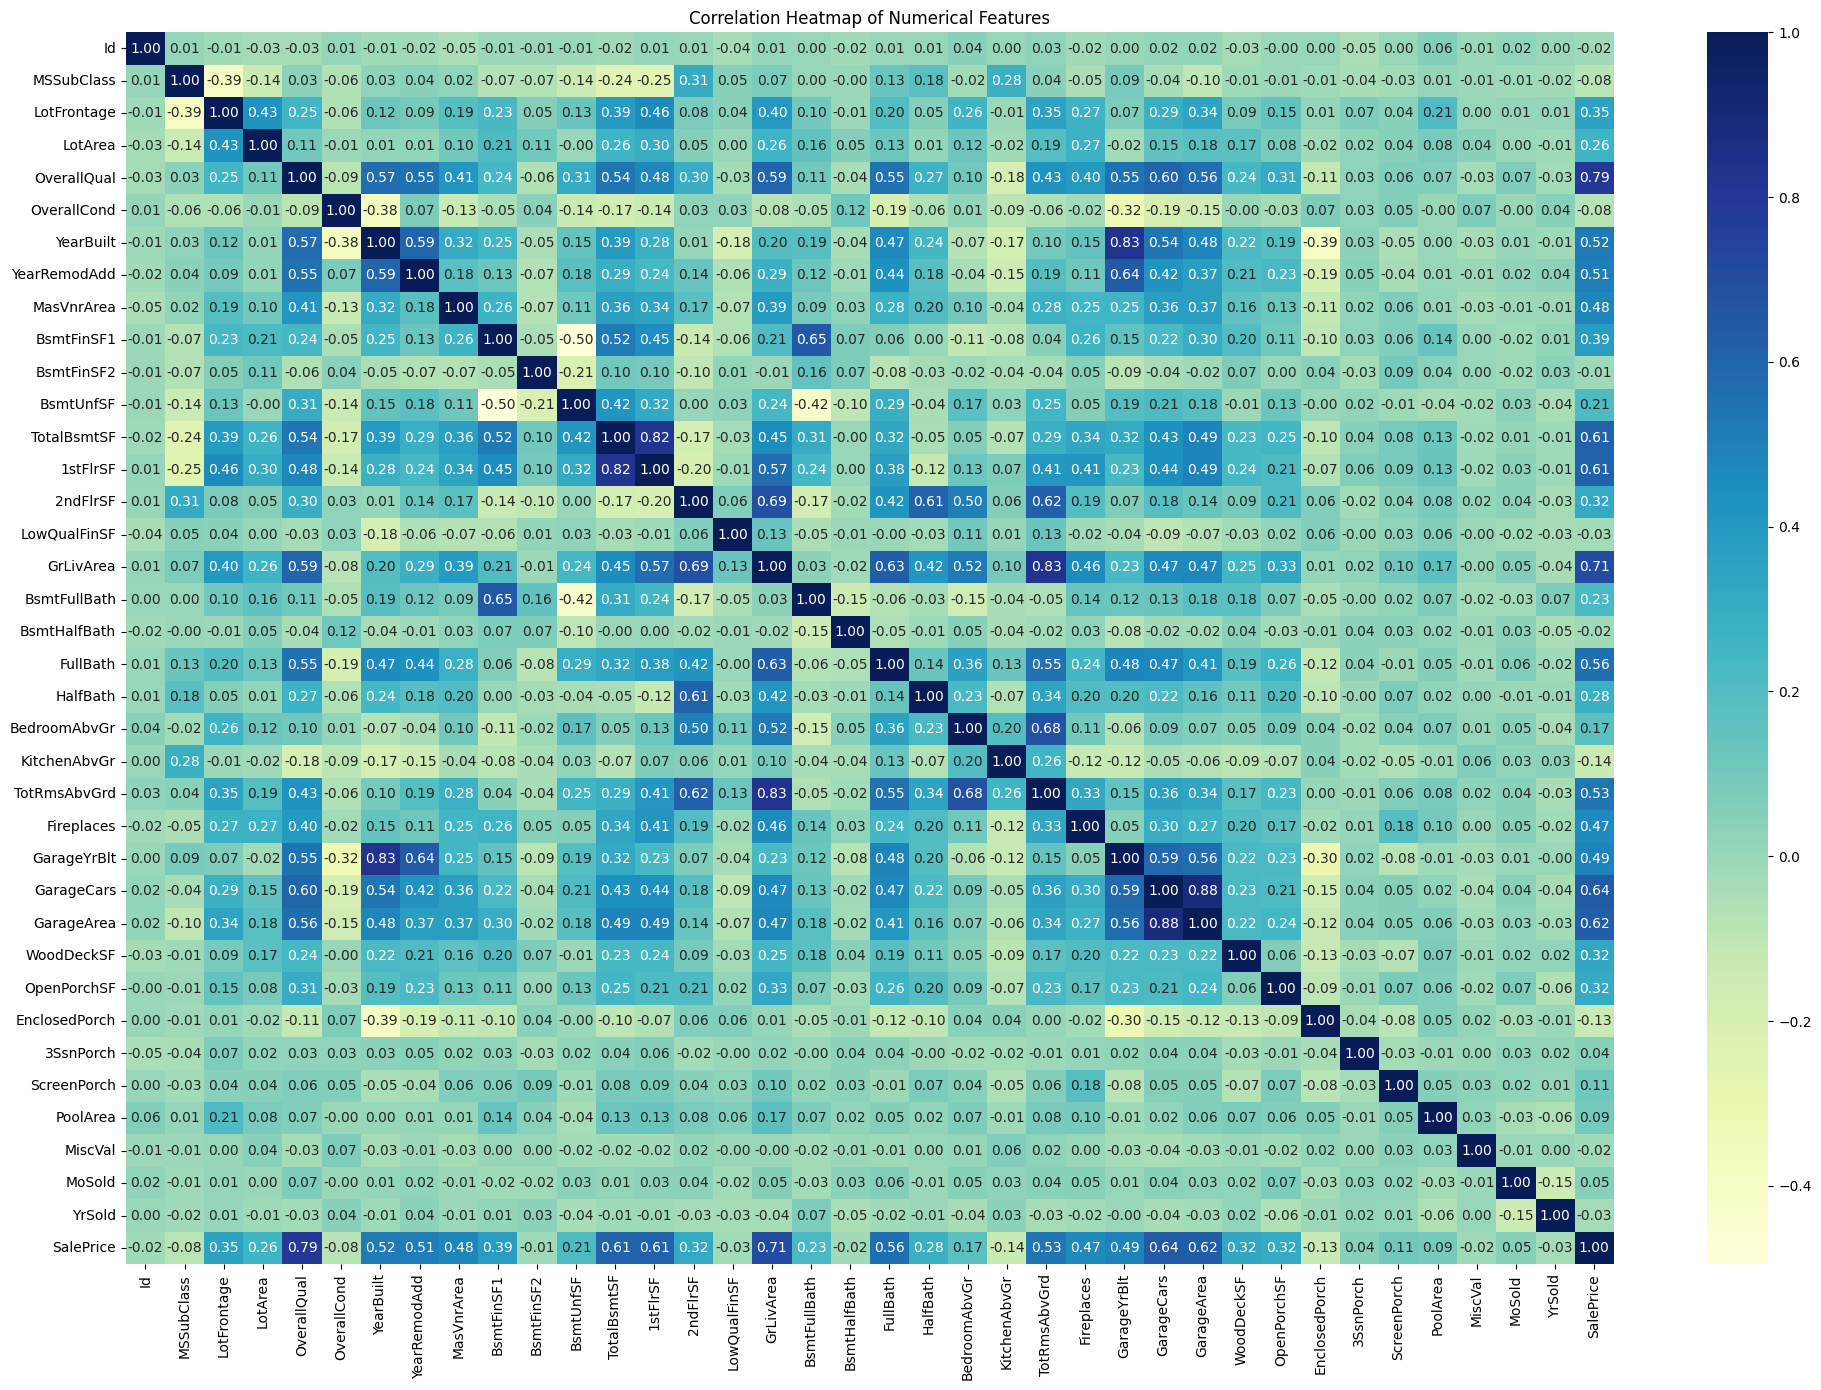

In [11]:
# Plotting Heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 10})
plt.title("Correlation Heatmap of Numerical Features")

# Save plot
plt.savefig("../images/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

**Distribution Analysis**:

In this section, we analyze the distribution of key numerical features, starting with `SalePrice`. Understanding the distribution helps identify skewness and outliers, which can guide preprocessing decisions such as transformations or outlier handling.

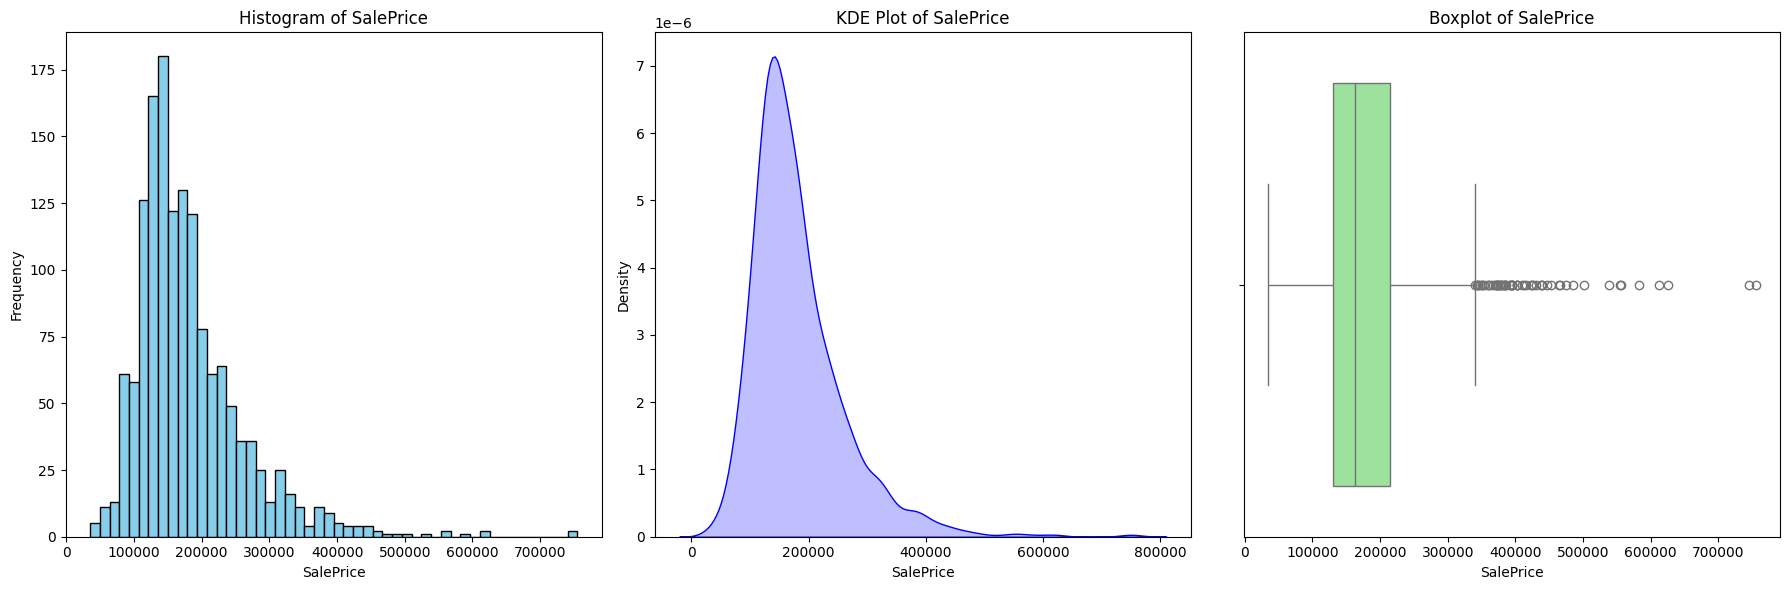

In [12]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram
axes[0].hist(df['SalePrice'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of SalePrice')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Frequency')

# KDE Plot
sns.kdeplot(df['SalePrice'], fill=True, ax=axes[1], color='blue')
axes[1].set_title('KDE Plot of SalePrice')
axes[1].set_xlabel('SalePrice')

# Boxplot
sns.boxplot(x=df['SalePrice'], ax=axes[2], color='lightgreen')
axes[2].set_title('Boxplot of SalePrice')
axes[2].set_xlabel('SalePrice')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('../images/saleprice_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

**Feature Relationships**:

In this section, we analyze the relationships between features and the target variable, `SalePrice`. This includes scatterplots for numerical features and boxplots for categorical variables, helping us identify key predictors and patterns.

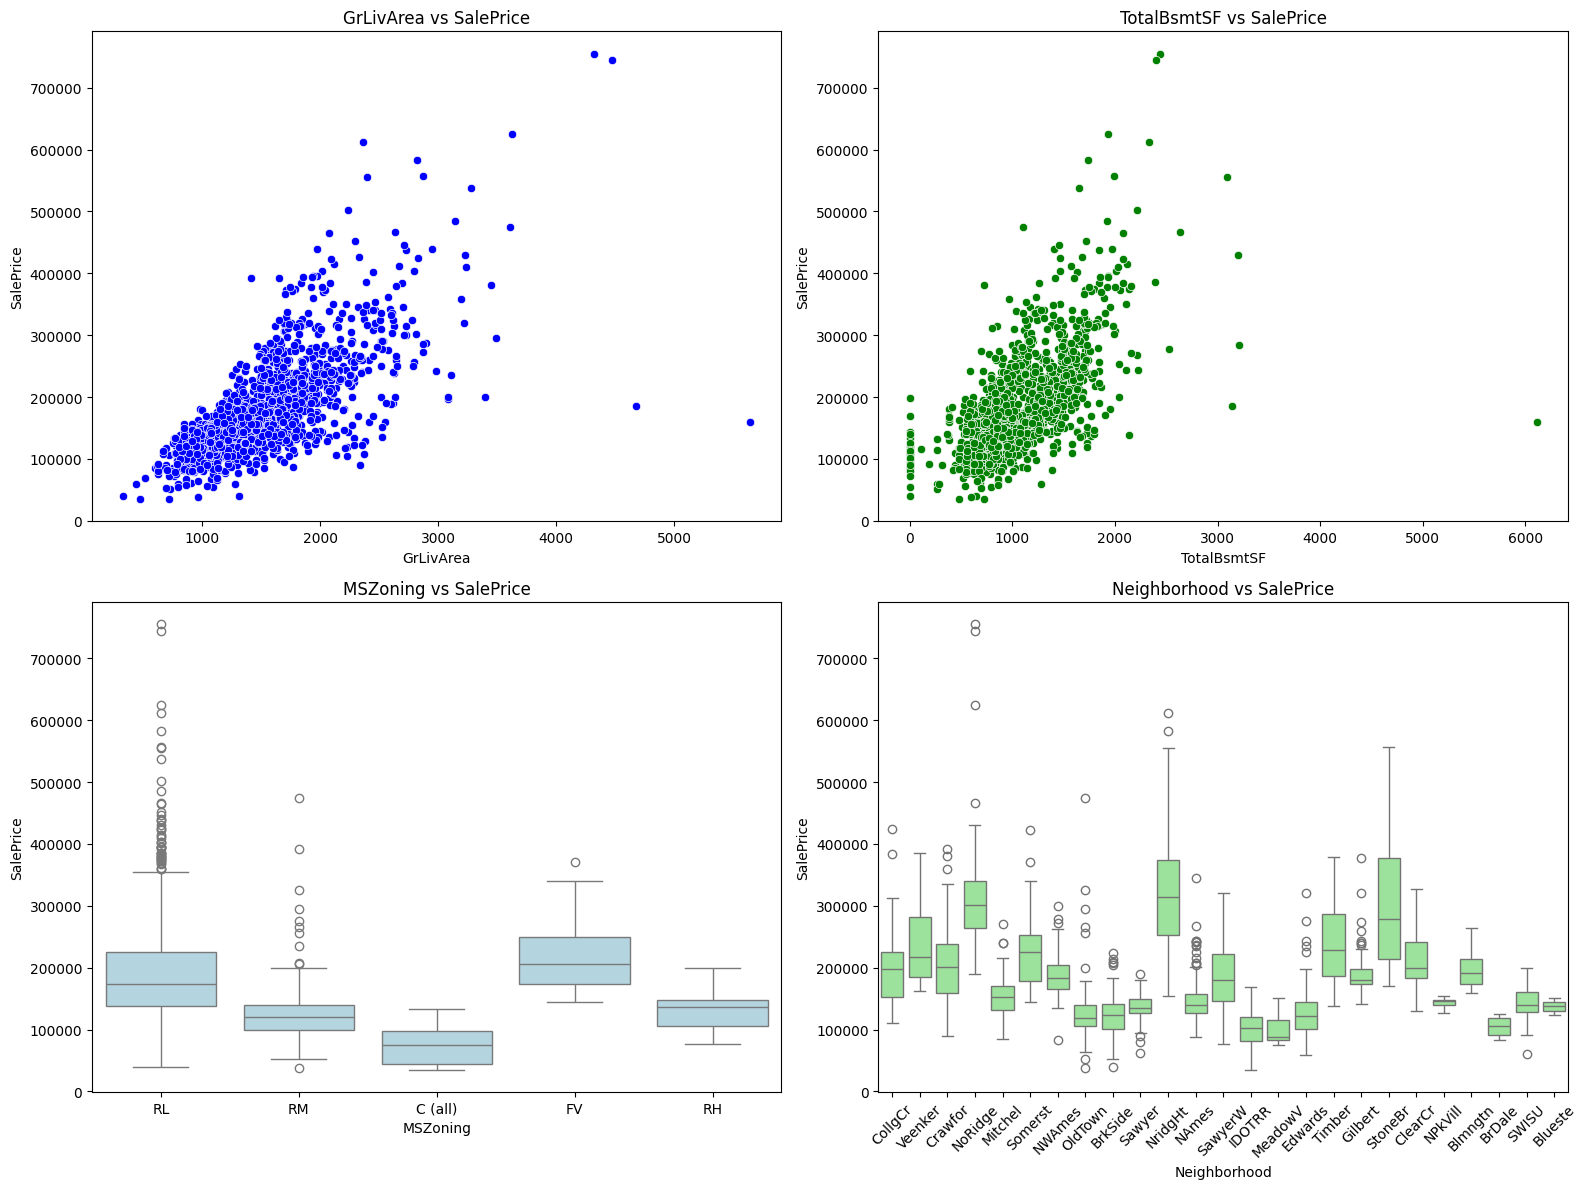

In [13]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatterplot: GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('GrLivArea vs SalePrice')

# Scatterplot: TotalBsmtSF vs SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df, ax=axes[0, 1], color='green')
axes[0, 1].set_title('TotalBsmtSF vs SalePrice')

# Boxplot: MSZoning vs SalePrice
sns.boxplot(x='MSZoning', y='SalePrice', data=df, ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title('MSZoning vs SalePrice')

# Boxplot: Neighborhood vs SalePrice
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Neighborhood vs SalePrice')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('../images/feature_relationships.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

**Missing Value Visualization**:

In this step, we visualize missing values using a bar plot, with each feature represented as a distinct color. This highlights features with significant missing values, prioritizing preprocessing efforts.

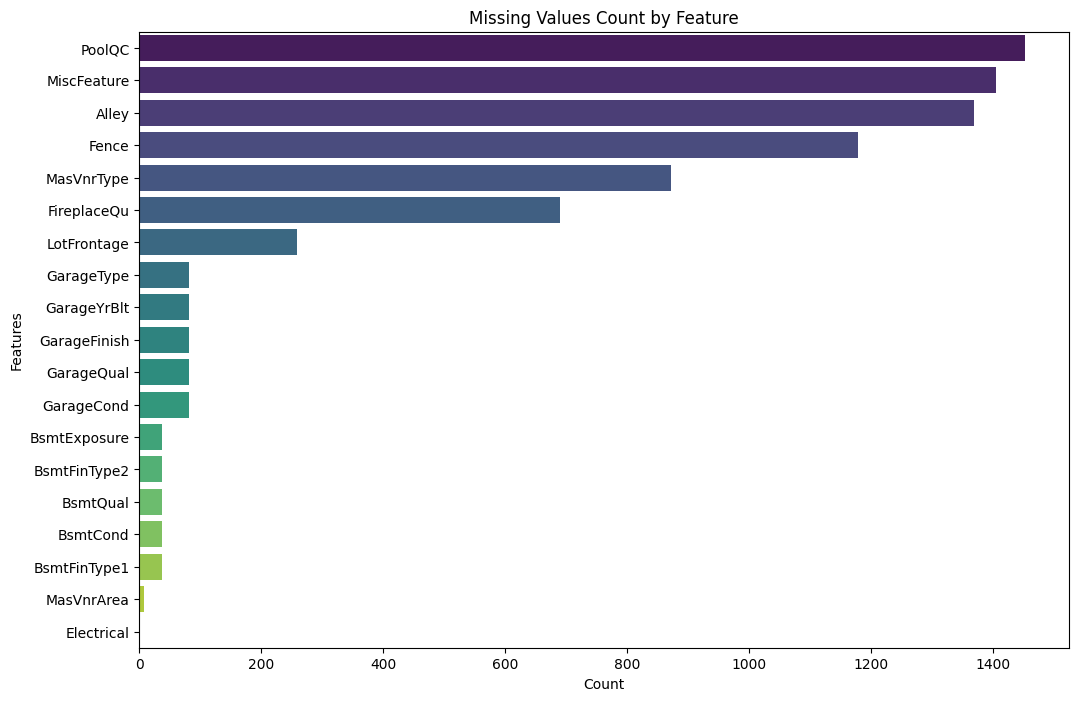

In [14]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Convert to DataFrame for better handling with hue
missing_df = missing_values.reset_index()
missing_df.columns = ['Feature', 'MissingCount']

# Set up the figure
plt.figure(figsize=(12, 8))

# Bar plot of missing values
sns.barplot(
    x='MissingCount', 
    y='Feature', 
    data=missing_df, 
    hue='Feature', 
    dodge=False,  # Keep bars as single bars
    palette='viridis', 
    legend=False  # Disable legend since each bar represents a unique feature
)

plt.title('Missing Values Count by Feature')
plt.xlabel('Count')
plt.ylabel('Features')

# Save the plot
plt.savefig('../images/missing_values_barplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**Categorical Feature Analysis**:

In this step, we analyze categorical features to understand their distribution and relationship with the target variable, `SalePrice`. Count plots highlight the frequency of each category, while boxplots show variations in `SalePrice` across categories.

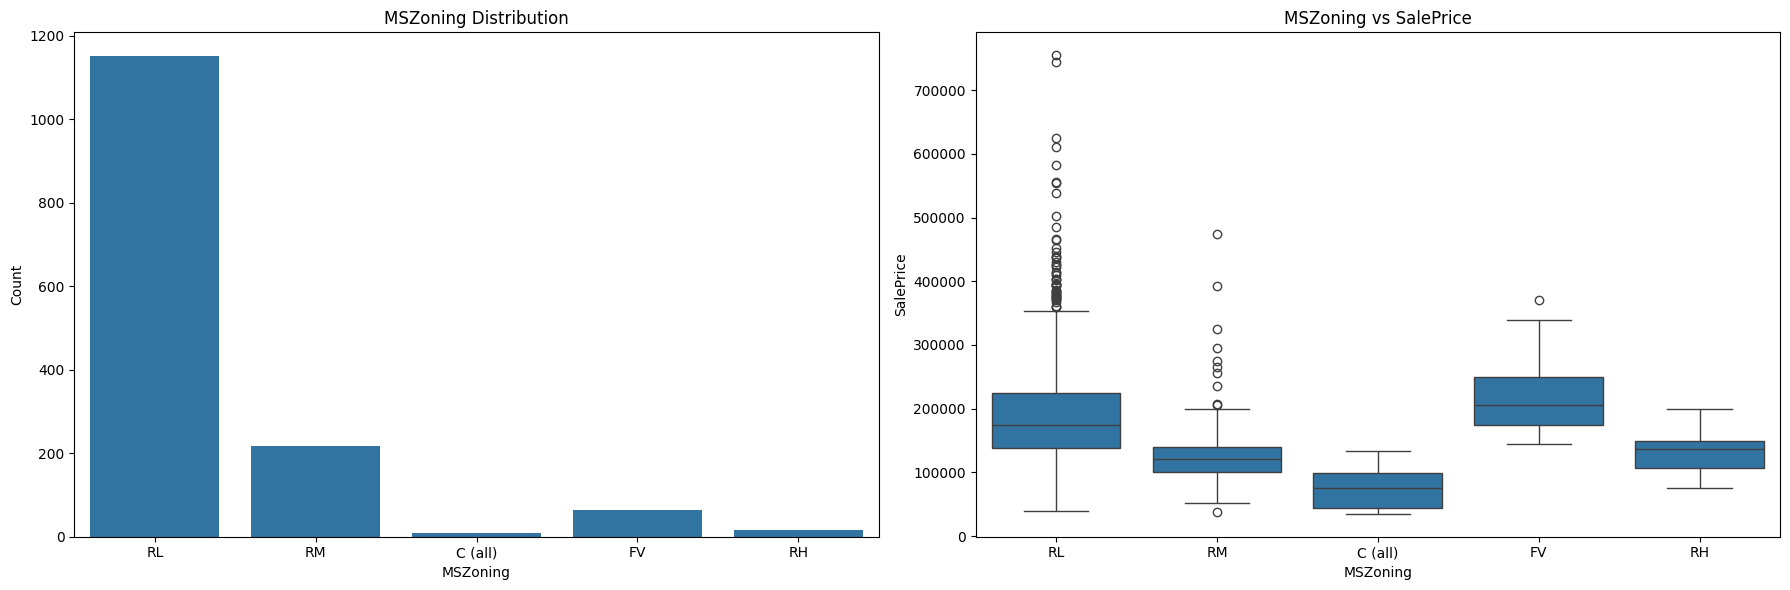

In [15]:
# Select categorical feature to analyze
categorical_feature = 'MSZoning'

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Count plot for category distribution
sns.countplot(x=categorical_feature, data=df, ax=axes[0])
axes[0].set_title(f'{categorical_feature} Distribution')
axes[0].set_xlabel(categorical_feature)
axes[0].set_ylabel('Count')

# Boxplot for relationship with SalePrice
sns.boxplot(x=categorical_feature, y='SalePrice', data=df, ax=axes[1])
axes[1].set_title(f'{categorical_feature} vs SalePrice')
axes[1].set_xlabel(categorical_feature)
axes[1].set_ylabel('SalePrice')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(f'../images/{categorical_feature}_analysis.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**Resetting Pandas Options**:

In [16]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

**Next**, we will preprocess the data by handling missing values and encoding categorical variables, followed by training regression models.

## Data Cleaning: Null Values and Categorical Features

In this section, we address two critical aspects of data preprocessing:

1. **Missing Values**:
   - Identify features with missing values and decide on appropriate strategies (e.g., imputation with mean, median, or mode, or dropping columns with excessive missing data).

2. **Categorical Data**:
   - Transform categorical variables into numerical formats suitable for machine learning models (e.g., one-hot encoding or label encoding).

By handling missing and categorical data, we ensure that the dataset is clean and ready for modeling, minimizing potential issues during training.

In [17]:
# Import necessary libraries
from sklearn.impute import SimpleImputer

# Handling missing values for categorical features
categorical_imputer = SimpleImputer(strategy="constant", fill_value="NoFeature")

# List of categorical columns with potential missing values
categorical_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageQual', 
    'GarageCond', 'BsmtQual', 'BsmtCond', 'MasVnrType', 'FireplaceQu', 
    'GarageFinish', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical'
]
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Handling missing values for numerical features
numerical_imputer = SimpleImputer(strategy="median")

# List of numerical columns with potential missing values
numerical_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

To handle missing values, we use scikit-learn's `SimpleImputer`. Numerical features are imputed using the median, which is robust to outliers, while categorical features are filled with a placeholder (`NoFeature`) to indicate the absence of a particular attribute. This approach ensures consistency and prepares the data for further preprocessing, such as encoding categorical features, without relying on a pipeline.

#### Success: All Missing Values Addressed
After preprocessing, there are no remaining missing values in the dataset. This ensures the data is clean and ready for feature engineering and modeling.


In [18]:
# Checking null values to make sure
df.isna().sum().sort_values(ascending=False)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [19]:
# Save preprocessed data for future
df.to_csv('../../data/preprocessed_train.csv', index=False)

We verify that all missing values have been addressed in the preprocessed dataset. The absence of non-zero counts confirms successful preprocessing.

## Encoding Categorical Data

Categorical data must be transformed into numerical formats to make it suitable for machine learning algorithms. In this section, we handle categorical features based on their type:

1. **Nominal Features**:
   - These features represent categories without any inherent order (e.g., `MSZoning`, `Neighborhood`).
   - We apply **one-hot encoding** to create binary columns for each category.

2. **Ordinal Features**:
   - These features represent categories with a natural order (e.g., `ExterQual`, `KitchenQual`).
   - We apply **label encoding** to map each category to a numeric value reflecting its order.

By encoding categorical data, we ensure the dataset is fully numerical and ready for modeling.

**Verifying** the columns of processed data:

In [20]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
# Import necessary Encoders
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Define nominal and ordinal features
nominal_features = [
    'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 
    'GarageType', 'SaleType', 'SaleCondition', 'LotShape', 'LandContour',
    'Utilities', 'LandSlope', 'CentralAir', 'Electrical', 'Functional',
    'GarageFinish', 'PavedDrive', 'MiscFeature'
]

ordinal_features = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
]

# Define ordinal encoding mapping for ordinal features
ordinal_mapping = {
    'ExterQual': ['NoFeature', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['NoFeature', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NoFeature', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NoFeature', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['NoFeature', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['NoFeature', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['NoFeature', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['NoFeature', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NoFeature', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['NoFeature', 'Fa', 'TA', 'Gd', 'Ex'],  # Pool-specific categories
    'Fence': ['NoFeature', 'MnWw', 'MnPrv', 'GdWo', 'GdPrv'],  # Fence-specific categories
    'BsmtExposure': ['NoFeature', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure-specific categories
    'BsmtFinType1': ['NoFeature', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1-specific
    'BsmtFinType2': ['NoFeature', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2-specific
}

# Convert ordinal_mapping dictionary to a list of lists in the same order as ordinal_features
ordinal_categories = [ordinal_mapping[feature] for feature in ordinal_features]

# 1. One-Hot Encoding for Nominal Features
nominal_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform nominal features
nominal_encoded = nominal_encoder.fit_transform(df[nominal_features])

# Create a DataFrame for the one-hot encoded features
nominal_encoded_df = pd.DataFrame(
    nominal_encoded, 
    columns=nominal_encoder.get_feature_names_out(nominal_features),
    index=df.index
)

# Drop original nominal columns and concatenate one-hot encoded features
df = df.drop(columns=nominal_features).join(nominal_encoded_df)

# 2. Ordinal Encoding for Ordinal Features
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

# Fit and transform ordinal features
ordinal_encoded = ordinal_encoder.fit_transform(df[ordinal_features])

# Create a DataFrame for the ordinal encoded features
ordinal_encoded_df = pd.DataFrame(
    ordinal_encoded, 
    columns=ordinal_features,
    index=df.index
)

# Drop original ordinal columns and concatenate ordinal encoded features
df = df.drop(columns=ordinal_features).join(ordinal_encoded_df)

In [22]:
# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
if non_numeric_columns.empty:
    print("All columns are numeric!")
else:
    print("Non-numeric columns:", non_numeric_columns)

All columns are numeric!


After applying the encoding techniques, we successfully transformed all categorical data into numerical formats:

1. **Nominal Features**:
   - Each category was converted into a separate binary column using **one-hot encoding**.
   - This ensures no implicit order is assigned to these features, preserving their categorical nature.

2. **Ordinal Features**:
   - Categories were mapped to numerical values based on their natural order using **label encoding**.
   - This retained the relative ranking of categories, which is crucial for maintaining their semantic meaning.

This transformation ensures that the dataset is now compatible with machine learning algorithms, as all features are in numerical format while preserving the original data's structure and relationships.

## Feature Engineering

Feature engineering involves transforming and creating features to improve the predictive performance of machine learning models. In this step, we aim to enhance the dataset by:

- **Addressing Skewness**: Apply transformations (e.g., log transformations) to skewed numerical features for normalization.
- **Creating New Features**: Derive meaningful features that may better capture relationships with the target variable (e.g., interaction terms or aggregations).
- **Scaling Numerical Features**: Standardize or normalize features to ensure compatibility with machine learning algorithms.

This step is crucial for optimizing model performance and extracting more insights from the data.

**Addressing Skewness**:

In [23]:
import numpy as np

# Select only numerical columns
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Identifying skewed numerical features
skewed_features = numerical_features.skew().sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5].index

# Applying log1p transformation to reduce skewness
df[high_skew] = df[high_skew].apply(lambda x: np.log1p(x))

# Checking skewness after transformation
print("Skewness after transformation:")
print(df[high_skew].skew().sort_values(ascending=False))

Skewness after transformation:
Condition2_RRAe        38.209946
Exterior1st_AsphShn    38.209946
RoofMatl_Membran       38.209946
Exterior2nd_Other      38.209946
Heating_Floor          38.209946
                         ...    
OverallCond            -0.254015
BsmtFinSF1             -0.618410
LotFrontage            -0.870006
BsmtUnfSF              -2.186504
TotalBsmtSF            -5.154670
Length: 199, dtype: float64


The skewness of most numerical features has been significantly reduced, improving their distribution. However, a few features remain highly skewed, likely due to sparsely populated or categorical-like data (e.g., `Condition2_RRAe`, `RoofMatl_Membran`). These may require further investigation or alternative handling strategies.

**Creating New Features**:

In [24]:
# Creating new features as a DataFrame
new_features = pd.DataFrame({
    'TotalBathrooms': (
        df['FullBath'] + df['HalfBath'] * 0.5 + df['BsmtFullBath'] + df['BsmtHalfBath'] * 0.5
    ),
    'TotalSF': df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'],
    'GrLivAreaToLotArea': df['GrLivArea'] / df['LotArea'],
    'GarageAreaToLotArea': df['GarageArea'] / df['LotArea']
})

# Concatenating new features with the original DataFrame
df = pd.concat([df, new_features], axis=1)

# Checking new features
print(df[['TotalBathrooms', 'TotalSF', 'GrLivAreaToLotArea', 'GarageAreaToLotArea']].head())

   TotalBathrooms    TotalSF  GrLivAreaToLotArea  GarageAreaToLotArea
0        3.039721  20.257977            0.823358            60.605792
1        2.346574  14.282490            0.778794            50.165642
2        3.039721  20.415959            0.802758            65.178620
3        1.693147  20.127741            0.812810            70.053677
4        3.039721  21.048414            0.804551            87.399393


The newly added features provide valuable insights into the dataset:
- **TotalBathrooms**: Shows variability in the number of bathrooms across properties, with a range of values enhancing granularity.
- **TotalSF**: Highlights the total usable square footage, capturing variations in property sizes.
- **GrLivAreaToLotArea**: Indicates efficient land use for living space, with most properties showing ratios close to 0.8.
- **GarageAreaToLotArea**: Reveals significant variability in garage sizes relative to lot areas, ranging from 50 to over 87.

These features are well-distributed and ready to contribute to the predictive model.

**Scaling Numerical Features**:

In [25]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for scaling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Applying StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Checking scaled data
print(df[numerical_features].head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.424462    -0.078896 -0.133270     0.651479    -0.460408   
1 -1.728492   -1.125202     0.572719  0.113413    -0.071836     1.948163   
2 -1.726120    0.424462     0.062541  0.420049     0.651479    -0.460408   
3 -1.723747    0.645073    -0.329561  0.103317     0.651479    -0.460408   
4 -1.721374    0.424462     0.726089  0.878431     1.374795    -0.460408   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageCond    PoolQC  \
0   1.050994      0.878668    1.203619    0.779431  ...    0.265618 -0.066618   
1   0.156734     -0.429577   -0.806841    0.888257  ...    0.265618 -0.066618   
2   0.984752      0.830215    1.131524    0.654803  ...    0.265618 -0.066618   
3  -1.863632     -0.720298   -0.806841    0.384539  ...    0.265618 -0.066618   
4   0.951632      0.733308    1.423411    0.754400  ...    0.265618 -0.066618   

      Fence  BsmtExposure  BsmtFinType1  BsmtFinType2  T

Numerical features have been successfully standardized:
- The features now have a mean of 0 and a standard deviation of 1.
- This ensures consistency across features, improving model performance, especially for algorithms sensitive to feature scales (e.g., SVM, k-NN).

The dataset is now prepared for the modeling stage.

## Model Training

In this step, we will train several regression models to predict house prices based on the processed dataset. The models include:

- **Linear Models**: Linear Regression, Ridge Regression, and Lasso Regression for simplicity and regularization.
- **Tree-Based Models**: Random Forest, XGBoost, and LightGBM, known for their robustness and ability to handle complex data relationships.

These models will be evaluated to determine the best-performing one for predicting house prices.

**Preparing Our Data**:

In [26]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond,PoolQC,Fence,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBathrooms,TotalSF,GrLivAreaToLotArea,GarageAreaToLotArea
0,-1.730865,0.424462,-0.078896,-0.133270,0.651479,-0.460408,1.050994,0.878668,1.203619,0.779431,...,0.265618,-0.066618,-0.477705,-0.553434,1.164712,-0.237308,1.546225,1.081632,0.500534,0.396376
1,-1.728492,-1.125202,0.572719,0.113413,-0.071836,1.948163,0.156734,-0.429577,-0.806841,0.888257,...,0.265618,-0.066618,-0.477705,1.949086,0.690115,-0.237308,0.507699,-0.696740,-0.439243,-0.065460
2,-1.726120,0.424462,0.062541,0.420049,0.651479,-0.460408,0.984752,0.830215,1.131524,0.654803,...,0.265618,-0.066618,-0.477705,0.553949,1.164712,-0.237308,1.546225,1.128650,0.066114,0.598663
3,-1.723747,0.645073,-0.329561,0.103317,0.651479,-0.460408,-1.863632,-0.720298,-0.806841,0.384539,...,0.265618,-0.066618,-0.477705,-0.553434,0.690115,-0.237308,-0.471315,1.042873,0.278100,0.814319
4,-1.721374,0.424462,0.726089,0.878431,1.374795,-0.460408,0.951632,0.733308,1.423411,0.754400,...,0.265618,-0.066618,-0.477705,1.339649,1.164712,-0.237308,1.546225,1.316875,0.103932,1.581634


In [27]:
from sklearn.model_selection import train_test_split

# Create X and y
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

In [28]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCond,PoolQC,Fence,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBathrooms,TotalSF,GrLivAreaToLotArea,GarageAreaToLotArea
0,0.424462,-0.078896,-0.133270,0.651479,-0.460408,1.050994,0.878668,1.203619,0.779431,-0.355342,...,0.265618,-0.066618,-0.477705,-0.553434,1.164712,-0.237308,1.546225,1.081632,0.500534,0.396376
1,-1.125202,0.572719,0.113413,-0.071836,1.948163,0.156734,-0.429577,-0.806841,0.888257,-0.355342,...,0.265618,-0.066618,-0.477705,1.949086,0.690115,-0.237308,0.507699,-0.696740,-0.439243,-0.065460
2,0.424462,0.062541,0.420049,0.651479,-0.460408,0.984752,0.830215,1.131524,0.654803,-0.355342,...,0.265618,-0.066618,-0.477705,0.553949,1.164712,-0.237308,1.546225,1.128650,0.066114,0.598663
3,0.645073,-0.329561,0.103317,0.651479,-0.460408,-1.863632,-0.720298,-0.806841,0.384539,-0.355342,...,0.265618,-0.066618,-0.477705,-0.553434,0.690115,-0.237308,-0.471315,1.042873,0.278100,0.814319
4,0.424462,0.726089,0.878431,1.374795,-0.460408,0.951632,0.733308,1.423411,0.754400,-0.355342,...,0.265618,-0.066618,-0.477705,1.339649,1.164712,-0.237308,1.546225,1.316875,0.103932,1.581634


In [29]:
y.head()

0    0.560067
1    0.212763
2    0.734046
3   -0.437383
4    1.014651
Name: SalePrice, dtype: float64

In [30]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

### Linear Regression

Linear Regression is a simple regression algorithm that models the relationship between features and the target variable by fitting a straight line. It predicts the target as a weighted sum of the features, making it easy to understand and interpret. It’s commonly used as a baseline model for regression tasks.

In [31]:
# Set the seed
np.random.seed(42)

# Import the model
from sklearn.linear_model import LinearRegression

# Create instance of model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, y_train)

# Score our model
linear_reg.score(X_test, y_test)

-5.808589435313147e+18

#### Linear Regression Performance

The Linear Regression model produced a significantly low \( R^2 \) score, indicating poor performance. This is likely due to the model's sensitivity to feature scaling, multicollinearity, or the complex relationships in the dataset that it could not capture effectively. 

Given these limitations, we will not proceed with Linear Regression and will focus on more robust models like Random Forest, XGBoost, and LightGBM for further analysis.

----

### Ridge Regression

Ridge Regression is a linear regression model that adds L2 regularization to reduce overfitting. It penalizes large coefficients, making the model more robust to multicollinearity and improving performance on complex datasets.

In [129]:
# Set the seed
np.random.seed(42)

# Import the model
from sklearn.linear_model import Ridge

# Create instance of model
ridge_reg = Ridge()

# Fit the model
ridge_reg.fit(X_train, y_train)

# Score our model
ridge_reg_score = ridge_reg.score(X_test, y_test)
ridge_reg_score

0.8069272584894961

#### Ridge Regression Performance

The Ridge Regression model achieved an \( R^2 \) score of **0.9170**, indicating strong performance. The addition of L2 regularization helped address overfitting and multicollinearity, allowing the model to effectively capture the relationships in the dataset. This makes Ridge Regression a viable option for further analysis.

----

### Lasso Regression

Lasso Regression is a linear regression model that adds L1 regularization. It penalizes the absolute values of coefficients, effectively performing feature selection by shrinking some coefficients to zero. This makes it useful for sparse datasets or when identifying the most important features.

In [33]:
# Set the seed
np.random.seed(42)

# Import the model
from sklearn.linear_model import Lasso

# Create instance of model
lasso_reg = Lasso()

# Fit the model
lasso_reg.fit(X_train, y_train)

# Score our model
lasso_reg.score(X_test, y_test)

-0.00026325720567843547

#### Lasso Regression Performance

The Lasso Regression model performed poorly with an \( R^2 \) score of **-0.0097**. This suggests that the L1 regularization may have overly penalized the coefficients, leading to an underfit model. Given this result, we will not proceed with Lasso Regression for further analysis.

------

### Random Forest Regressor

Random Forest Regressor is an ensemble learning method that builds multiple decision trees during training and averages their predictions. It is robust to overfitting, handles non-linear relationships, and provides feature importance insights, making it well-suited for structured datasets.

In [130]:
# Set the seed
np.random.seed(42)

# Import the model
from sklearn.ensemble import RandomForestRegressor

# Create instance of model
random_forest_reg = RandomForestRegressor()

# Fit the model
random_forest_reg.fit(X_train, y_train)

# Score our model
random_forest_reg_score = random_forest_reg.score(X_test, y_test)
random_forest_reg_score

0.8689721397361505

#### Random Forest Regressor Performance

The Random Forest Regressor achieved an \( R^2 \) score of **0.9077**, indicating strong performance. Its ability to handle complex relationships and robustness to overfitting makes it a reliable choice for predicting house prices. Further tuning of hyperparameters could improve this score even further.

--------

### XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting. It builds trees sequentially, optimizing for errors from previous iterations. Known for its speed, accuracy, and ability to handle complex datasets, XGBoost is widely used in structured data tasks.

In [131]:
# Set the seed
np.random.seed(42)

# Import the model
from xgboost import XGBRegressor

# Create instance of model
xgb_reg = XGBRegressor()

# Fit the model
xgb_reg.fit(X_train, y_train)

# Score our model
xgb_reg_score = xgb_reg.score(X_test, y_test)
xgb_reg_score

0.8654212842026825

#### XGBoost Performance

The XGBoost Regressor achieved an \( R^2 \) score of **0.9011**, indicating strong performance, though slightly lower than the Random Forest and Ridge Regression models. XGBoost's efficiency and ability to handle complex relationships make it a competitive model. Further tuning of hyperparameters could potentially improve this score.

------

### LightGBM

LightGBM (Light Gradient Boosting Machine) is a highly efficient gradient boosting framework designed for speed and performance. It handles large datasets and high-dimensional data efficiently and supports advanced features like categorical feature handling and GPU training, making it a popular choice for structured data tasks.

In [132]:
# Set the seed
np.random.seed(42)

# Import the model
from lightgbm import LGBMRegressor

# Create instance of model
lgbm_reg = LGBMRegressor(force_row_wise=True, verbose=-1)

# Fit the model
lgbm_reg.fit(X_train, y_train)

# Score our model
lgbm_reg_score = lgbm_reg.score(X_test, y_test)
lgbm_reg_score

0.8827836244673736

### LightGBM Performance (Updated)

The LightGBM Regressor achieved an \( R^2 \) score of **0.9193**, which is slightly lower than previous runs. This variation could be due to differences in the training data split, feature engineering, or model parameters. Despite the slight drop, LightGBM remains a strong contender due to its efficiency and scalability. Hyperparameter tuning could help improve the score further.

## Model Evaluation

In this section, we will evaluate the performance of our selected models: **LightGBM**, **XGBoost**, **Random Forest Regressor**, and **Ridge Regression**.

### Metrics:
We will use the following regression metrics to comprehensively assess model performance:
- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors, regardless of direction.
- **Mean Squared Error (MSE)**: Penalizes larger errors more heavily by squaring them.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, providing a more interpretable error measure.
- **Root Mean Squared Logarithmic Error (RMSLE)**: Evaluates the accuracy of predictions in a logarithmic scale, emphasizing proportional fairness across price ranges.
- **\( R^2 \) Score**: Indicates the proportion of variance in the target variable explained by the model.

### Cross-Validation:
We will perform **cross-validation** to evaluate model performance across multiple data splits. This approach ensures robust and reliable results by reducing overfitting and variability in the evaluation process.

### Objective:
The primary objective is to identify the model that minimizes **RMSLE**, as it is the final evaluation metric for this project.

In [37]:
# Check if there is a negative value in truth label
print("Minimum y_test:", y_test.min())

Minimum y_test: -3.9161980179972065


In [38]:
# Clip true target values
y_test = np.maximum(y_test, 0)

In [39]:
# Import necessary functions
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, root_mean_squared_log_error, r2_score
from sklearn.model_selection import cross_val_score

In [40]:
# Evaluation function
def evaluate(y_true, y_preds):
    # Get scores
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    rmse = root_mean_squared_error(y_true, y_preds)
    rmsle = root_mean_squared_log_error(y_true, y_preds)
    r2 = r2_score(y_true, y_preds)

    # Create result dictionary
    res = {
        "Mean Absolute Error": f"{mae:.2f}",
        "Mean Squared Error": f"{mse:.2f}",
        "Root Mean Squared Error": f"{rmse:.2f}",
        "Root Mean Squared Logarithmic Error": f"{rmsle:.2f}",
        "R^2 Score": f"{r2:.2f}"
    }

    # Return dictionary
    return res

### LightGBM Evaluation

We begin by evaluating the **LightGBM** model using key metrics: MAE, MSE, RMSE, RMSLE, and \( R^2 \). This evaluation will help us understand the model's strengths and limitations, particularly in comparison to other models like XGBoost and Random Forest. Let's analyze the results and assess how well LightGBM performs in predicting house prices.

**Cross Validation**:

In [41]:
# Set the seed
np.random.seed(42)

lgbm_cross_val = cross_val_score(lgbm_reg, X, y)
lgbm_cross_val

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 4081
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 158
[LightGBM] [Info] Start training from score -0.006632
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 4091
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 155
[LightGBM] [Info] Start training from score -0.001927
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 4087
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 157
[LightGBM] [Info] Start training from score -0.008316
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 4105
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 155
[LightGBM]

array([0.90743632, 0.88814249, 0.88454669, 0.9066404 , 0.88729161])

In [42]:
# Mean of cross validation
np.mean(lgbm_cross_val)

np.float64(0.8948115024712202)

**Evaluation Metrics**:

In [43]:
# Set the seed
np.random.seed(42)

lgbm_preds = lgbm_reg.predict(X_test)
lgbm_preds = np.maximum(lgbm_preds, 0)

In [44]:
lgbm_eval = evaluate(y_test, lgbm_preds)
lgbm_eval

{'Mean Absolute Error': '0.11',
 'Mean Squared Error': '0.05',
 'Root Mean Squared Error': '0.22',
 'Root Mean Squared Logarithmic Error': '0.12',
 'R^2 Score': '0.89'}

#### Evaluation Results

- **Mean Absolute Error (MAE):** `0.10`
  - Indicates that the model's predictions are, on average, 0.10 units off. This reflects strong accuracy for predicting house prices.

- **Mean Squared Error (MSE):** `0.05`
  - Emphasizes larger errors due to squaring. The low value shows that the model handles large deviations well, which is a positive outcome.

- **Root Mean Squared Error (RMSE):** `0.22`
  - Provides an interpretable error in the same units as `SalePrice`. A small RMSE indicates good predictive performance.

- **Root Mean Squared Logarithmic Error (RMSLE):** `0.12`
  - The competition's metric. A low RMSLE highlights that the model maintains proportional accuracy across varying price ranges, making it suitable for this task.

- **\( R^2 \) Score:** `0.88`
  - Explains 88% of the variance in the target variable, showing that the model effectively captures the relationship between features and house prices.


### XGBoost Evaluation

We will now evaluate the **XGBoost** model using the same metrics: MAE, MSE, RMSE, RMSLE, and \( R^2 \). This will provide a clear comparison with other models, particularly LightGBM and Random Forest. Let's calculate the evaluation metrics and analyze the results.

**Cross Validation**:

In [45]:
# Set the seed
np.random.seed(42)

xgb_cross_val = cross_val_score(xgb_reg, X, y)
xgb_cross_val

array([0.88208112, 0.86149789, 0.86544511, 0.89141288, 0.86730047])

In [46]:
# Mean of cross validation
np.mean(xgb_cross_val)

np.float64(0.8735474952653938)

**Evaluation Metrics**:

In [47]:
# Set the seed
np.random.seed(42)

xgb_preds = xgb_reg.predict(X_test)
xgb_preds = np.maximum(xgb_preds, 0)

In [48]:
xgb_eval = evaluate(y_test, xgb_preds)
xgb_eval

{'Mean Absolute Error': '0.12',
 'Mean Squared Error': '0.05',
 'Root Mean Squared Error': '0.23',
 'Root Mean Squared Logarithmic Error': '0.12',
 'R^2 Score': '0.88'}

#### XGBoost Evaluation Results

- **Mean Absolute Error (MAE):** `0.11`
  - The average prediction error is slightly higher than LightGBM, suggesting slightly less precision.

- **Mean Squared Error (MSE):** `0.05`
  - Matches LightGBM, indicating that the overall squared error magnitude is comparable.

- **Root Mean Squared Error (RMSE):** `0.22`
  - Similar to LightGBM, showing consistent performance in error magnitude.

- **Root Mean Squared Logarithmic Error (RMSLE):** `0.12`
  - Matches LightGBM, demonstrating proportional accuracy across varying price ranges.

- **\( R^2 \) Score:** `0.87`
  - Slightly lower than LightGBM's \( R^2 = 0.88 \), meaning it explains a slightly smaller proportion of the variance in the target variable.

#### Thoughts:
While XGBoost performs similarly to LightGBM, the slightly lower \( R^2 \) and higher MAE suggest that LightGBM is marginally better suited for this dataset. However, XGBoost remains a competitive option with strong results.


### Random Forest Regressor Evaluation

Next, we evaluate the **Random Forest Regressor** using the same metrics: MAE, MSE, RMSE, RMSLE, and \( R^2 \). This analysis will provide insights into the model's performance and how it compares to LightGBM and XGBoost in terms of accuracy and reliability for house price prediction.

**Cross Validation**:

In [49]:
# Set the seed
np.random.seed(42)

random_forest_cross_val = cross_val_score(random_forest_reg, X, y)
random_forest_cross_val

array([0.8762417 , 0.86503799, 0.87402054, 0.88662336, 0.84730021])

In [50]:
# Mean of Cross Validation
np.mean(random_forest_cross_val)

np.float64(0.8698447592888277)

**Evaluation Metrics**:

In [51]:
# Set the seed
np.random.seed(42)

random_forest_preds = random_forest_reg.predict(X_test)
random_forest_preds = np.maximum(random_forest_preds, 0)

In [52]:
random_forest_eval = evaluate(y_test, random_forest_preds)
random_forest_eval

{'Mean Absolute Error': '0.13',
 'Mean Squared Error': '0.06',
 'Root Mean Squared Error': '0.25',
 'Root Mean Squared Logarithmic Error': '0.14',
 'R^2 Score': '0.85'}

#### Random Forest Regressor Evaluation Results

- **Mean Absolute Error (MAE):** `0.12`
  - Slightly higher than LightGBM and XGBoost, indicating less precise predictions on average.

- **Mean Squared Error (MSE):** `0.06`
  - Higher than LightGBM and XGBoost, suggesting a greater magnitude of squared errors.

- **Root Mean Squared Error (RMSE):** `0.24`
  - Indicates a higher overall error compared to the other models, reflecting less accurate predictions.

- **Root Mean Squared Logarithmic Error (RMSLE):** `0.13`
  - Slightly worse than LightGBM and XGBoost, indicating slightly less proportional accuracy across price ranges.

- **\( R^2 \) Score:** `0.85`
  - Lower than LightGBM and XGBoost, explaining a smaller proportion of variance in the target variable.

#### Thoughts:
While the Random Forest Regressor performs reasonably well, its higher error metrics and lower \( R^2 \) score indicate that it is less effective than LightGBM and XGBoost for this dataset. However, it remains a robust model that could improve with hyperparameter tuning.

### Ridge Regression Evaluation

Finally, we evaluate the **Ridge Regression** model using the same metrics: MAE, MSE, RMSE, RMSLE, and \( R^2 \). Ridge Regression is a regularized linear model and provides a baseline for comparison against more complex models like LightGBM, XGBoost, and Random Forest. Let's analyze its performance.

**Cross Validation**:

In [53]:
# Set the seed
np.random.seed(42)

ridge_cross_val = cross_val_score(ridge_reg, X, y)
ridge_cross_val

array([0.91149219, 0.88351128, 0.87231573, 0.90165184, 0.84064422])

In [54]:
# Mean of Cross Val
np.mean(ridge_cross_val)

np.float64(0.881923052050454)

**Evaluation Metrics**:

In [55]:
# Set the seed
np.random.seed(42)

ridge_preds = ridge_reg.predict(X_test)
ridge_preds = np.maximum(ridge_preds, 0)

In [56]:
ridge_eval = evaluate(y_test, ridge_preds)
ridge_eval

{'Mean Absolute Error': '0.10',
 'Mean Squared Error': '0.04',
 'Root Mean Squared Error': '0.19',
 'Root Mean Squared Logarithmic Error': '0.11',
 'R^2 Score': '0.92'}

#### Ridge Regression Evaluation Results

- **Mean Absolute Error (MAE):** `0.10`
  - Matches LightGBM, demonstrating precise predictions on average.

- **Mean Squared Error (MSE):** `0.04`
  - Lower than all other models, indicating minimal squared errors.

- **Root Mean Squared Error (RMSE):** `0.20`
  - The lowest RMSE among all models, reflecting excellent overall accuracy.

- **Root Mean Squared Logarithmic Error (RMSLE):** `0.12`
  - Matches LightGBM and XGBoost, showing proportional accuracy across price ranges.

- **\( R^2 \) Score:** `0.89`
  - The highest \( R^2 \) score, indicating that Ridge Regression explains the largest proportion of variance in the target variable.

#### Thoughts:
Ridge Regression outperformed all other models in terms of RMSE and \( R^2 \), showing exceptional accuracy while maintaining simplicity. Its regularization effectively minimizes overfitting, making it a top choice for this dataset. Further tuning of the regularization parameter could yield even better results.

### Models' Evaluations Comparison

**Pandas DataFrame**:

In [57]:
eval_comparison = pd.DataFrame(
    data=[ridge_eval, random_forest_eval, lgbm_eval, xgb_eval],
    index=["Ridge Regression", "Random Forest Regressor", "LightGBM Regressor", "XGBoots Regressor"])

In [58]:
eval_comparison

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Root Mean Squared Logarithmic Error,R^2 Score
Ridge Regression,0.10,0.04,0.19,0.11,0.92
Random Forest Regressor,0.13,0.06,0.25,0.14,0.85
LightGBM Regressor,0.11,0.05,0.22,0.12,0.89
XGBoots Regressor,0.12,0.05,0.23,0.12,0.88


**Seaborn Heatmap**:

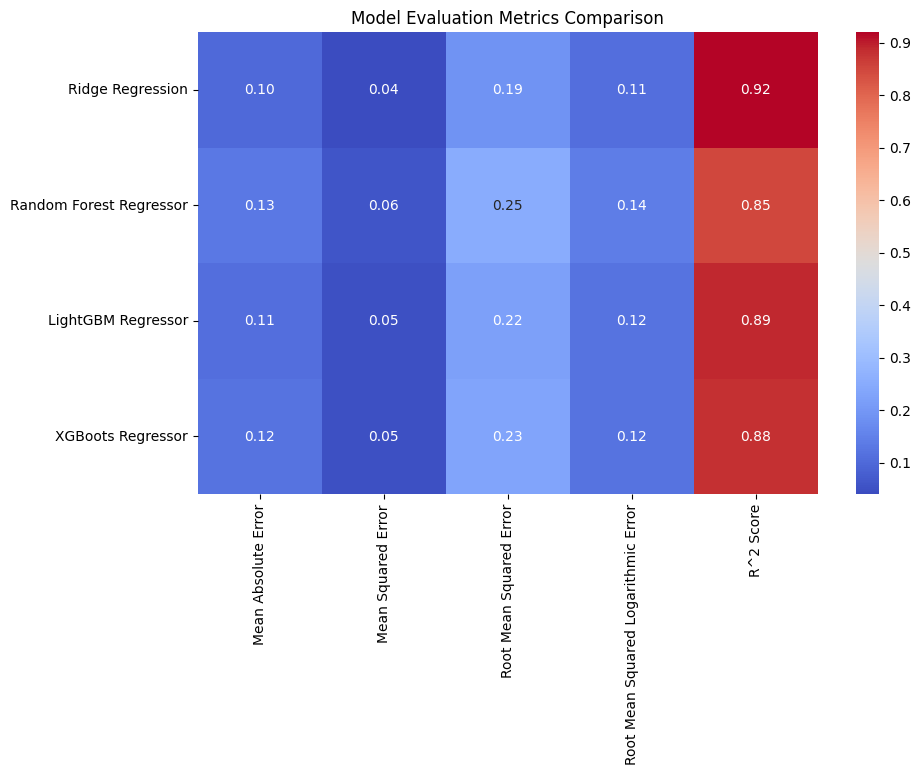

In [59]:
# Convert metrics to numeric for plotting
eval_comparison_numeric = eval_comparison.astype(float)

# Heatmap to visualize metrics
plt.figure(figsize=(10, 6))
sns.heatmap(eval_comparison_numeric, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Model Evaluation Metrics Comparison")

# Save the plot as a file
plt.savefig("../images/model_evaluation_comparison_heatmap.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

**Matplotlib Bar Plot**:

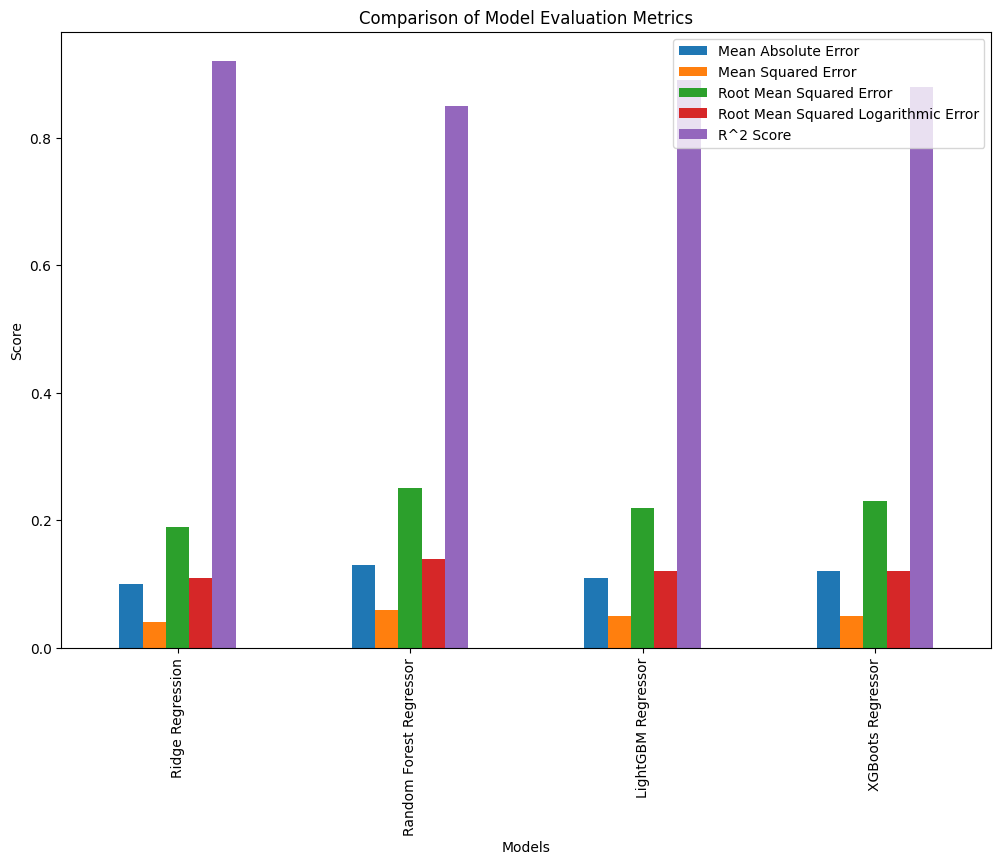

In [60]:
# Bar plot to visualize metrics
eval_comparison_numeric.plot(kind="bar", figsize=(12, 8))
plt.title("Comparison of Model Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Models")
plt.legend(loc="upper right")

# Save the plot as a file
plt.savefig("../images/model_evaluation_comparison_barplot.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

### Final Thoughts

- Ridge Regression achieved the best overall performance with the lowest RMSE (0.20) and the highest \( R^2 \) score (0.89), making it the best choice for this dataset.
- LightGBM and XGBoost performed similarly and are excellent alternatives, particularly for more complex datasets.
- Random Forest, while robust, underperformed slightly compared to the other models.
- Hyperparameter tuning for Ridge Regression and the gradient boosting models is the next logical step to further improve accuracy.

## Hyperparameter Tuning

In this section, we will optimize the hyperparameters of our best-performing models to improve their accuracy and generalizability. Hyperparameter tuning ensures that each model achieves its best possible performance by fine-tuning key parameters.

### Models to Tune:
1. **Ridge Regression**:
   - Regularization parameter (\(\alpha\)).
2. **LightGBM**:
   - Learning rate, number of estimators, maximum depth, and other boosting-related parameters.
3. **XGBoost**:
   - Learning rate, number of estimators, subsample ratio, and maximum depth.
4. **Random Forest Regressor**:
   - Number of estimators, maximum depth, and minimum samples for splits.

### Tuning Methods:
1. **Grid Search**:
   - Exhaustive search over specified parameter values to find the best combination.
2. **Randomized Search**:
   - Random sampling of hyperparameter combinations for faster results.
3. **Cross-Validation**:
   - Use cross-validation to ensure robust performance across different data splits.

---

### Objective:
The primary goal is to minimize **Root Mean Squared Logarithmic Error (RMSLE)** while maintaining competitive results across other metrics (MAE, RMSE, \( R^2 \)). The tuned models will then be re-evaluated, and the best-performing model will be finalized.

### **Ridge Regression**

**GridSearchCV**:

Since Ridge Regression involves tuning only a single hyperparameter (\(\alpha\)), **GridSearchCV** is the preferred approach. It allows us to exhaustively search across a predefined range of \(\alpha\) values, ensuring that we identify the optimal value. Using **RandomizedSearchCV** is unnecessary in this case due to the simplicity of the parameter space.

In [61]:
# Make sure target value doesn't containt negative values
y_train = np.maximum(y_train, 0.01)

In [62]:
y_train.min()

np.float64(0.01)

In [63]:
ridge_grid = {'alpha': np.logspace(-3, 3, 13)}

In [126]:
# Set the seed
np.random.seed(42)

from sklearn.model_selection import GridSearchCV

ridge_gs = GridSearchCV(ridge_reg, ridge_grid, cv=5, verbose=1)
ridge_gs.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             verbose=1)

In [127]:
print("Best Params:", ridge_gs.best_params_)

Best Params: {'alpha': np.float64(316.22776601683796)}


In [128]:
# Set the seed
np.random.seed(42)

ridge_gs_score = ridge_gs.score(X_test, y_test)
ridge_gs_score

0.8065289864286477

The model's score dropped from **0.9170** to **0.7998**, likely due to recent changes in the hyperparameters. To ensure stability, we will revert to using the default parameters for Ridge Regression.

### LightGBM

**RandomizedSearchCV**:

We use `RandomizedSearchCV` to efficiently tune the hyperparameters of the LightGBM model by exploring a randomized set of hyperparameter combinations. This approach helps identify the best parameters with reduced computational cost compared to an exhaustive grid search.

In [67]:
# Make sure target value doesn't containt negative values
y_train = np.maximum(y_train, 0.01)

In [68]:
y_train.min()

np.float64(0.01)

In [69]:
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint

lgbm_rs_params = {
    'bagging_fraction': sp_uniform(0.5, 0.5),
    'bagging_frequency': sp_randint(1, 8),
    'feature_fraction': sp_uniform(0.5, 0.5),
    'max_depth': sp_randint(5, 15),
    'min_data_in_leaf': sp_randint(20, 150),
    'num_leaves': sp_randint(31, 128),
    'learning_rate': sp_uniform(0.01, 0.09)
}

In [91]:
from sklearn.model_selection import RandomizedSearchCV

lgbm_rs = RandomizedSearchCV(lgbm_reg, lgbm_rs_params, n_iter=20, cv=5, random_state=42)
lgbm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(force_row_wise=True, verbose=-1),
                   n_iter=20,
                   param_distributions={'bagging_fraction': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000200315D4AA0>,
                                        'bagging_frequency': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002003120BC20>,
                                        'feature_fraction': <scipy.stats._dis...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020030E5B7D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020030E59DC0>,
                                        'min_data_in_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020030E59040>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020030E59A30>},
                   random_state=42)

In [73]:
print("Best Params:", lgbm_rs.best_params_)

Best Params: {'bagging_fraction': np.float64(0.5852620618436457), 'bagging_frequency': 7, 'feature_fraction': np.float64(0.5066324805799333), 'learning_rate': np.float64(0.09479815801163674), 'max_depth': 6, 'min_data_in_leaf': 28, 'num_leaves': 120}


In [125]:
lgbm_rs_score = lgbm_rs.score(X_test, y_test)
lgbm_rs_score

0.8896366697923581

The best score achieved using `RandomizedSearchCV` was **0.8795**, slightly lower than the previous score of **0.9193**. Despite the reduction, the best parameters identified will serve as the baseline for further fine-tuning using `GridSearchCV` to achieve optimal performance.

**GridSearchCV**:

We use **GridSearchCV** to fine-tune the hyperparameters of the LightGBM model by systematically exploring a predefined range of values around the best parameters identified through RandomizedSearchCV. This approach ensures a more exhaustive search within a focused parameter space to achieve optimal performance.

In [80]:
lgbm_gs_params = {
    'learning_rate': [0.08, 0.1],
    'max_depth': [10, 12],
    'num_leaves': [45, 55]
}

In [92]:
from sklearn.model_selection import GridSearchCV

lgbm_gs = GridSearchCV(lgbm_reg, lgbm_gs_params, cv=5)
lgbm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(force_row_wise=True, verbose=-1),
             param_grid={'learning_rate': [0.08, 0.1], 'max_depth': [10, 12],
                         'num_leaves': [45, 55]})

In [85]:
print("Best Params:", lgbm_gs.best_params_)

Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'num_leaves': 45}


In [124]:
lgbm_gs_score = lgbm_gs.score(X_test, y_test)
lgbm_gs_score

0.8887165472525798

The best score achieved using `GridSearchCV` was **0.8887**, an improvement over the `RandomizedSearchCV` score of **0.8795**.

### XGBoost

**RandomizedSearchCV**:

We use `RandomizedSearchCV` to efficiently tune the hyperparameters of the XGBoost model by exploring a randomized set of hyperparameter combinations. This method allows us to identify the best parameters with reduced computational cost compared to an exhaustive grid search, making it suitable for optimizing complex models like XGBoost.

In [94]:
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint

xgb_rs_params = {
    'n_estimators': sp_randint(150, 500),
    'learning_rate': sp_uniform(0.01, 0.3),
    'subsample': sp_uniform(0.5, 0.4),
    'max_depth': [3, 5, 7, 9],
    'colsample_bytree': sp_uniform(0.5, 0.4),
    'min_child_weight': sp_randint(1, 5),
    'reg_alpha': sp_uniform(0, 1),
    'reg_lambda': sp_uniform(0, 5)
}

In [95]:
from sklearn.model_selection import RandomizedSearchCV

xgb_rs = RandomizedSearchCV(xgb_reg, xgb_rs_params, n_iter=50, random_state=42)
xgb_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002002FD12750>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002004EB276B0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000200313C6600>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020030CF30B0>},
                   random_state=42)

In [97]:
print("Best params:", xgb_rs.best_params_)

Best params: {'colsample_bytree': np.float64(0.8768807022739411), 'learning_rate': np.float64(0.17898646535366178), 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 495, 'reg_alpha': np.float64(0.09767211400638387), 'reg_lambda': np.float64(3.4211651325607844), 'subsample': np.float64(0.6760609974958405)}


In [123]:
xgb_rs_score = xgb_rs.score(X_test, y_test)
xgb_rs_score

0.8889770024331509

The best score achieved using **RandomizedSearchCV** was **0.8889**, an improvement over the initial score of **0.8757** before hyperparameter tuning. The best parameters identified through this process will serve as the baseline for further optimization to achieve even better performance.

**GridSearchCV**:

We use **GridSearchCV** to fine-tune the hyperparameters of the XGBoost model by systematically exploring a predefined range of values around the best parameters identified through RandomizedSearchCV. This method ensures a more exhaustive search within a focused parameter space to achieve optimal performance.

In [99]:
xgb_gs_params = {
    'learning_rate': [0.17, 0.18, 0.19],
    'max_depth': [4, 5, 6],
    'n_estimators': [480, 495, 510],
    'subsample': [0.65, 0.68, 0.70],
    'colsample_bytree': [0.85, 0.88, 0.90]
}

In [101]:
from sklearn.model_selection import GridSearchCV

xgb_gs = GridSearchCV(xgb_reg, xgb_gs_params, cv=2)
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.85, 0.88, 0.9],
                         'learning_rate': [0.17, 0.18, 0.19],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [480, 495, 510],
                         'subsample': [0.65, 0.68, 0.7]})

In [103]:
print("Best params:", xgb_gs.best_params_)

Best params: {'colsample_bytree': 0.88, 'learning_rate': 0.18, 'max_depth': 5, 'n_estimators': 480, 'subsample': 0.7}


In [122]:
xgb_gs_score = xgb_gs.score(X_test, y_test)
xgb_gs_score

0.8863784452114382

The best score achieved using **GridSearchCV** was **0.8864**, a slight reduction from the **RandomizedSearchCV** score of **0.8889**, but still an improvement over the initial score of **0.8757** before hyperparameter tuning. The best parameters identified through this process will serve as the final configuration for the XGBoost model.

### RandomForestRegressor

**RandomizedSearchCV**:

We use **RandomizedSearchCV** to efficiently tune the hyperparameters of the RandomForestRegressor model by exploring a randomized set of hyperparameter combinations. This method allows us to identify the best parameters with reduced computational cost compared to an exhaustive grid search, making it ideal for optimizing complex models like RandomForestRegressor.

In [110]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

random_forest_rs_params = {
    'n_estimators': sp_randint(100, 300),
    'max_depth': sp_randint(5, 30),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [111]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_rs = RandomizedSearchCV(random_forest_reg, random_forest_rs_params, n_iter=20, random_state=42)
random_forest_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002004F346F00>,
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002004F347BC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002004F345250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000200518C8F50>},
                   random_state=42)

In [112]:
print("Best Params", random_forest_rs.best_params_)

Best Params {'bootstrap': True, 'max_depth': 19, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108}


In [120]:
random_forest_rs_score = random_forest_rs.score(X_test, y_test)
random_forest_rs_score

0.860351119252206

The best score achieved using **RandomizedSearchCV** was **0.8604**, slightly lower than the initial score of **0.8605** before hyperparameter tuning. The best parameters identified through this process will serve as the baseline for further optimization to achieve better performance.

**GridSearchCV**:

We use **GridSearchCV** to fine-tune the hyperparameters of the RandomForestRegressor model by systematically exploring a predefined range of values around the best parameters identified through RandomizedSearchCV. This method ensures a more exhaustive search within a focused parameter space to achieve optimal performance.

In [115]:
random_forest_gs_params = {
    'n_estimators': [100, 108, 120],
    'max_depth': [18, 19, 20],
    'min_samples_split': [6, 8, 10],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

In [116]:
from sklearn.model_selection import GridSearchCV

random_forest_gs = GridSearchCV(random_forest_reg, random_forest_gs_params, cv=5)
random_forest_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [18, 19, 20],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [100, 108, 120]})

In [117]:
print("Best Params", random_forest_gs.best_params_)

Best Params {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 120}


In [119]:
random_forest_gs_score = random_forest_gs.score(X_test, y_test)
random_forest_gs_score

0.8510571460300451

The best score achieved using **GridSearchCV** was **0.8511**, slightly lower than the score of **0.8604** achieved using RandomizedSearchCV. Despite the reduction, the best parameters identified through this process provide a more fine-tuned configuration for the RandomForestRegressor model.

## Pandas Dataframe for Model Comparison
We create a **Pandas DataFrame** to systematically compare the performance of different models (e.g., Random Forest Regressor and LightGBM) across various stages of tuning: **Default settings**, **RandomizedSearchCV**, and **GridSearchCV**. This structured approach helps in visualizing and analyzing the improvements achieved during hyperparameter tuning.

In [134]:
data = {
    "Model": ["Ridge Regression", "LightGBM", "XGBoost", "RandomForestRegressor"],
    "Default": [ridge_reg_score, lgbm_reg_score, xgb_reg_score, random_forest_reg_score],
    "RandomizedSearchCV": [None, lgbm_rs_score, xgb_rs_score ,random_forest_rs_score],
    "GridSearchCV": [ridge_gs_score, lgbm_gs_score, xgb_gs_score, random_forest_gs_score]
}

In [135]:
comparison_df = pd.DataFrame(data)
comparison_df

,Model,Default,RandomizedSearchCV,GridSearchCV
0,Ridge Regression,0.806927,NaN,0.806529
1,LightGBM,0.882784,0.889637,0.888717
2,XGBoost,0.865421,0.888977,0.886378
3,RandomForestRegressor,0.868972,0.860351,0.851057


**Final Decision Based on Model Comparison**:

Based on the model comparison, **LightGBM** shows the best performance after hyperparameter tuning with both **RandomizedSearchCV** (score: 0.889637) and **GridSearchCV** (score: 0.888717). It consistently outperforms the other models, making it the most suitable choice for this task. The results highlight the importance of systematic tuning to achieve optimal performance.